/tmp/ipykernel_1928596/3257547257.py:27: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  results = execute(circuit, backend=simulator, shots=1024).result()


{'00': 523, '01': 501}


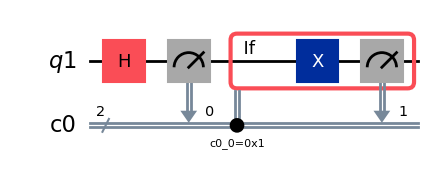

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import execute
import random
import numpy as np
import sys
sys.path.append("../")
from qmg.utils import MoleculeQuantumStateGenerator, CircuitBuilder
from typing import List, Union
from rdkit import RDLogger
import pickle
RDLogger.DisableLog('rdApp.*')

qubits = QuantumRegister(1)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
# (q0,) = qubits
(c0,c1) = clbits
 
circuit.h(qubits[0])
circuit.measure(qubits[0], c0)
with circuit.if_test((clbits[0], 1)):
    circuit.x(qubits[0])
    circuit.measure(qubits[0], c1)

simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator, shots=1024).result()
counts = results.get_counts(circuit)
print(counts)
circuit.draw("mpl", style="iqp")
 
# example output counts: {'0': 1024}

In [3]:
def controlled_ry(control:int, target:int, digit:float):
    qc.cry(np.pi*digit, control, target)

random.seed(1)
weight_vector = [random.random() for _ in range(8)]
qubits = QuantumRegister(6)
clbits = ClassicalRegister(6)
qc = QuantumCircuit(qubits, clbits)

def reset_qubit(qubit, cbit):
    with qc.if_test((clbits[cbit], 1)):
        qc.x(qubit)

qc.ry(np.pi * weight_vector[0], 0)
qc.x(1)
qc.ry(np.pi * weight_vector[2], 2)
qc.ry(np.pi * weight_vector[4], 3)
qc.cx(0, 1)
controlled_ry(1, 2, weight_vector[3])
qc.cx(2, 3)
controlled_ry(0, 1, weight_vector[1])
qc.cx(1, 2)
controlled_ry(2, 3, weight_vector[5])

# measure atom 1 state:
qc.measure(qubits[0:2], clbits[0:2])
# measure atom 2 state and save:
qc.measure(qubits[2:4], clbits[2:4])

# Add a new atom existence ClassicalRegister:
atom_existence_CR = ClassicalRegister(bits=clbits[2:4])
qc.add_register(atom_existence_CR)
with qc.if_test((atom_existence_CR, 0)) as else_:
    pass
with else_:
    qc.ry(np.pi * weight_vector[6], 4)
    qc.x(5)
    qc.cx(4,5)
    controlled_ry(4, 5, weight_vector[7])

    # reset atom type qubit:
    reset_qubit(2, 2)
    reset_qubit(3, 3)

qc.measure(qubits[4:6], clbits[4:6])

# bond type ClassicalRegister:
# bond_type_CR = ClassicalRegister(bits=clbits[4:6]) 

# reset atom and bond
for bond_type_qubit, bond_type_clbit in zip([4,5], [4,5]):
    reset_qubit(bond_type_qubit, bond_type_clbit)

simulator = Aer.get_backend('aer_simulator')
results = execute(qc, backend=simulator, shots=1024*10).result()
counts = results.get_counts(qc)
print(counts)
# qc.draw("mpl", style="mpl")
qc.draw("text")

{'01 1101': 2, '00 0001': 1, '11 1110': 5, '00 0010': 4839, '01 1110': 1, '11 1010': 3290, '10 1101': 7, '01 1010': 342, '11 1111': 43, '10 1010': 1308, '00 0011': 192, '10 1011': 49, '11 1101': 12, '11 1011': 105, '10 1111': 15, '11 1001': 1, '10 1110': 5, '01 1011': 16, '01 1111': 7}


/tmp/ipykernel_1660486/4032365686.py:55: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  results = execute(qc, backend=simulator, shots=1024*10).result()


┌─────────────┐                                       ┌─┐              »
q7_0: ┤ Ry(0.42212) ├──■───────────────────────■────────────┤M├──────────────»
      └────┬───┬────┘┌─┴─┐               ┌─────┴──────┐     └╥┘              »
q7_1: ─────┤ X ├─────┤ X ├───────■───────┤ Ry(2.6623) ├──■───╫───────────────»
       ┌───┴───┴────┐└───┘┌──────┴──────┐└────────────┘┌─┴─┐ ║               »
q7_2: ─┤ Ry(2.3995) ├─────┤ Ry(0.80132) ├──────■───────┤ X ├─╫───────■───────»
       ├────────────┤     └─────────────┘    ┌─┴─┐     └───┘ ║ ┌─────┴──────┐»
q7_3: ─┤ Ry(1.5565) ├────────────────────────┤ X ├───────────╫─┤ Ry(1.4121) ├»
       └────────────┘                        └───┘           ║ └────────────┘»
q7_4: ───────────────────────────────────────────────────────╫───────────────»
                                                             ║               »
q7_5: ───────────────────────────────────────────────────────╫───────────────»
                                                             ║               »
c2: 6/═══════════════════════════════════════════════════════╩═══════════════»
                                                             0               »
«                                                                         »
«q7_0: ───────────────────────────────────────────────────────────────────»
«      ┌─┐                                                                »
«q7_1: ┤M├────────────────────────────────────────────────────────────────»
«      └╥┘┌─┐   ┌────── ┌────────                ┌──────   ┌───┐ ───────┐ »
«q7_2: ─╫─┤M├───┤       ┤         ───────────────┤ If-1  ──┤ X ├  End-1 ├─»
«       ║ └╥┘┌─┐│       │                        └──╥───   └───┘ ───────┘ »
«q7_3: ─╫──╫─┤M├┤       ┤         ──────────────────╫─────────────────────»
«       ║  ║ └╥┘│ If-0  │ Else-0  ┌───────────┐     ║                     »
«q7_4: ─╫──╫──╫─┤       ┤         ┤ Ry(2.047) ├─────╫─────────────────────»
«       ║  ║  ║ │       │         └───┬───┬───┘     ║                     »
«q7_5: ─╫──╫──╫─┤       ┤         ────┤ X ├─────────╫─────────────────────»
«       ║  ║  ║ └──╥─── └────────     └───┘         ║                     »
«       ║  ║  ║ ┌──╨──┐                        ┌────╨─────┐               »
«c2: 6/═╩══╩══╩═╡ 0x0 ╞════════════════════════╡ c2_2=0x1 ╞═══════════════»
«       1  2  3 └─────┘                        └──────────┘               »
«                                                                    »
«q7_0: ──────────────────────────────────────────────────────────────»
«                                                                    »
«q7_1: ──────────────────────────────────────────────────────────────»
«                                                     ───────┐       »
«q7_2: ──────────────────────────────────────────────        ├───────»
«        ┌──────   ┌───┐ ───────┐                            │       »
«q7_3: ──┤ If-1  ──┤ X ├  End-1 ├────────────────────        ├───────»
«        └──╥───   └───┘ ───────┘                      End-0 │ ┌─┐   »
«q7_4: ─────╫───────────────────────■────────■───────        ├─┤M├───»
«           ║                     ┌─┴─┐┌─────┴──────┐        │ └╥┘┌─┐»
«q7_5: ─────╫─────────────────────┤ X ├┤ Ry(2.4778) ├        ├──╫─┤M├»
«      ┌────╨─────┐               └───┘└────────────┘ ───────┘  ║ └╥┘»
«c2: 6/╡ c2_3=0x1 ╞═════════════════════════════════════════════╩══╩═»
«      └──────────┘                                             4  5 »
«                                                            
«q7_0: ──────────────────────────────────────────────────────
«                                                            
«q7_1: ──────────────────────────────────────────────────────
«                                                            
«q7_2: ──────────────────────────────────────────────────────
«                                                            
«q7_3: ──────────────────────────────────────────────────────
«        ┌──────   ┌───┐ ───────┐           

In [57]:
num_heavy_atom = 9
num_sample = 2**15
assert num_heavy_atom >= 2
num_qubits = 4 + (num_heavy_atom-1) * 2
num_clbits = num_heavy_atom * (num_heavy_atom + 1)
num_weights = int(8 + (num_heavy_atom - 2)*(num_heavy_atom + 3) * 3 / 2)
print(num_weights)

data_generator = MoleculeQuantumStateGenerator(num_heavy_atom)
qubits = QuantumRegister(num_qubits)
clbits = ClassicalRegister(num_clbits)
qc = QuantumCircuit(qubits, clbits)
random.seed(1)
weight_vector = [random.random() for _ in range(num_weights)]

def get_classical_register_by_name(qc: QuantumCircuit, name: str):
    for cr in qc.cregs:
        if cr.name == name:
            return cr
    else:
        raise ValueError(f"The {name} is not found in classical registers.")

def softmax_temperature(weight_vector, temperature=0.2):
    weight_vector /= temperature
    exps = np.exp(weight_vector)
    return exps / np.sum(exps)

def build_two_atom_circuit(qc, weight_vector, qubits, clbits):
    qc.ry(np.pi * weight_vector[0], 0)
    qc.x(1)
    qc.ry(np.pi * weight_vector[2], 2)
    qc.ry(np.pi * weight_vector[4], 3)
    qc.cx(0, 1)
    controlled_ry(1, 2, weight_vector[3])
    qc.cx(2, 3)
    controlled_ry(0, 1, weight_vector[1])
    qc.cx(1, 2)
    controlled_ry(2, 3, weight_vector[5])

    # measure atom 1 state:
    qc.measure(qubits[0:2], clbits[0:2])
    # measure atom 2 state and save:
    qc.measure(qubits[2:4], clbits[2:4])

    # Add a new atom existence ClassicalRegister:
    atom_existence_CR = ClassicalRegister(bits=clbits[2:4], name="atom_2_existence")
    qc.add_register(atom_existence_CR)
    with qc.if_test((atom_existence_CR, 0)) as else_:
        pass
    with else_:
        qc.ry(np.pi * weight_vector[6], 4)
        qc.x(5)
        qc.cx(4,5)
        controlled_ry(4, 5, weight_vector[7])

    qc.measure(qubits[4:6], clbits[4:6])

def reset_previous_atom_bond_circuit(qc, heavy_idx):
    reset_qubits_index = list(range(2, 2*heavy_idx))
    start_clbit = (heavy_idx - 2)**2 + (heavy_idx - 2)
    reset_clbits_index = list(range(start_clbit, start_clbit+(heavy_idx - 1)*2))
    for qubit_index, clbit_index in zip(reset_qubits_index, reset_clbits_index):
        with qc.if_test((clbits[clbit_index], 1)):
            qc.x(qubit_index)

def build_atom_type_circuit(qc, heavy_idx: int, weight_vector: Union[List[float], np.ndarray]):
    assert len(weight_vector) == 3
    qubit_1_index = 2
    qubit_2_index = 3
    clbit_1_index = (heavy_idx - 1)**2 + (heavy_idx - 1)
    clbit_2_index = clbit_1_index + 1

    register_name = f"atom_{heavy_idx-1}_existence"
    atom_existence_CR = get_classical_register_by_name(qc, register_name)
    with qc.if_test((atom_existence_CR, 0)) as else_:
        pass
    with else_:
        qc.ry(np.pi * weight_vector[0], qubit_1_index)
        qc.ry(np.pi * weight_vector[1], qubit_2_index)
        qc.cx(qubit_1_index, qubit_2_index)
        controlled_ry(4, 5, weight_vector[2])
    qc.measure(qubits[[qubit_1_index,qubit_2_index]], clbits[[clbit_1_index,clbit_2_index]])
    # create new atom existence register
    atom_existence_CR = ClassicalRegister(bits=clbits[[clbit_1_index,clbit_2_index]], name=f"atom_{heavy_idx}_existence")
    qc.add_register(atom_existence_CR)

def build_bond_type_circuit(qc, heavy_idx: int, fixed_weight_vector: Union[List[float], np.ndarray],
                                flexible_weight_vector: Union[List[float], np.ndarray], remove_bond_disconnection=True):
    assert len(fixed_weight_vector) == heavy_idx-1
    assert len(flexible_weight_vector) == 2*(heavy_idx-1)
    qubit_start_index = 4
    qubit_end_index = qubit_start_index + 2*(heavy_idx - 1)
    clbit_start_index = (heavy_idx)**2 - heavy_idx + 2
    clbit_end_index = clbit_start_index + 2*(heavy_idx - 1)

    register_name = f"atom_{heavy_idx}_existence"
    atom_existence_CR = get_classical_register_by_name(qc, register_name)
    with qc.if_test((atom_existence_CR, 0)) as else_:
        pass
    with else_:
        for i in range(heavy_idx-1):
            qc.ry(np.pi * fixed_weight_vector[i], qubit_start_index+2*i+1)
            controlled_ry(qubit_start_index+2*i+1, qubit_start_index+2*i, flexible_weight_vector[2*i]) # < 0.5
            controlled_ry(qubit_start_index+2*i, qubit_start_index+2*i+1, flexible_weight_vector[2*i+1]) # > 0.5
        qc.measure(qubits[qubit_start_index:qubit_end_index], clbits[clbit_start_index:clbit_end_index])
        if remove_bond_disconnection:
            bond_disconnection_CR = ClassicalRegister(bits=clbits[clbit_start_index:clbit_end_index], name=f"bond_{heavy_idx}_connection")
            qc.add_register(bond_disconnection_CR)
            with qc.if_test((bond_disconnection_CR, 0)):
                qc.x(qubit_end_index-1)
                qc.measure(qubits[qubit_end_index-1], clbits[clbit_end_index-1])
    return

build_two_atom_circuit(qc, weight_vector, qubits, clbits)
for heavy_idx in range(3, num_heavy_atom+1):
    atom_type_weights = [random.random() for _ in range(3)]
    bond_type_fixed_weight_vector = np.array([random.random() for _ in range((heavy_idx-1))])
    bond_type_fixed_weight_vector = softmax_temperature(bond_type_fixed_weight_vector, temperature=0.2)
    bond_type_flexible_weight_vector = np.array([random.random()*0.5 for _ in range((heavy_idx-1)*2)])
    bond_type_flexible_weight_vector += np.array([0, 0.5]*(heavy_idx-1))
    print(bond_type_fixed_weight_vector)
    print(bond_type_flexible_weight_vector)

    reset_previous_atom_bond_circuit(qc, heavy_idx)
    build_atom_type_circuit(qc, heavy_idx, atom_type_weights)
    build_bond_type_circuit(qc, heavy_idx, bond_type_fixed_weight_vector,
                                bond_type_flexible_weight_vector, remove_bond_disconnection=True)
simulator = Aer.get_backend('aer_simulator')
results = execute(qc, backend=simulator, shots=num_sample).result()
counts = results.get_counts(qc)
print(counts)
# qc.draw("mpl", style="mpl")
qc.draw("text")

134
[0.66004602 0.33995398]
[0.23688551 0.51181729 0.19327855 0.71045934]
[0.35282179 0.07832275 0.56885546]
[0.40851983 0.51040905 0.00893226 0.57323087 0.35941774 0.5801138 ]
[0.01494505 0.65154993 0.2678523  0.06565272]
[0.11159789 0.82425321 0.197449   0.78792298 0.1606229  0.81547393
 0.02939256 0.64930297]
[0.30909303 0.0199432  0.46290064 0.17421338 0.03384975]
[0.12617905 0.50424013 0.43935895 0.51895827 0.40970706 0.98110056
 0.28514029 0.58575855 0.43389053 0.98688762]
[0.11198875 0.05528783 0.57507995 0.17217211 0.05216111 0.03331025]
[0.33297876 0.64803634 0.24989996 0.66267283 0.43581075 0.94983913
 0.00904649 0.60042651 0.16387035 0.99352486 0.39135019 0.66954782]
[0.2802109  0.01478857 0.21845307 0.08228231 0.02987729 0.3658218
 0.00856606]
[0.36273259 0.54234012 0.08484707 0.95549389 0.1064841  0.87955809
 0.30010442 0.9205661  0.184054   0.67014262 0.14560764 0.93370991
 0.30199126 0.97715373]
[0.00758953 0.00547988 0.00649714 0.34248794 0.23182364 0.28370204
 0.024776

/tmp/ipykernel_1660486/4127484079.py:129: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  results = execute(qc, backend=simulator, shots=num_sample).result()


{'1000000000000000 11 00000000000010 11 100000000000 11 0000000010 01 10000000 01 110010 11 0110 11 11 1010': 1, '0000000000000000 00 00000000000000 00 000000000000 00 0000000000 00 00000000 00 000000 00 0010 10 01 1111': 1, '0000000000000000 00 00000000000000 00 000000000000 00 1000000000 01 10000000 01 110000 11 0010 10 11 1010': 1, '1000000000000000 11 10000000000000 10 000000010000 01 0010000010 01 00001000 11 010000 10 0010 10 11 1010': 1, '0000000000000000 00 00000000000000 00 000000100000 01 1000000000 01 00001000 01 110000 01 1000 10 11 1010': 1, '0000000000000000 00 00000000000000 00 000000010001 01 1000000000 01 00100000 01 100000 10 0010 10 11 1010': 1, '0000000000000000 00 00000000000000 00 000000100000 01 0010100010 01 00101000 01 100000 11 1000 11 11 1010': 1, '1000000000000000 11 00100000000000 10 000000010000 11 1000000000 01 10000000 11 001000 10 0010 01 10 1010': 1, '1000000000000000 11 10000000000000 10 000000100000 11 1000000000 01 10000000 10 110000 11 0010 10 10 1

┌─────────────┐                                       ┌─┐»
 q251_0: ┤ Ry(0.42212) ├──■───────────────────────■────────────┤M├»
         └────┬───┬────┘┌─┴─┐               ┌─────┴──────┐     └╥┘»
 q251_1: ─────┤ X ├─────┤ X ├───────■───────┤ Ry(2.6623) ├──■───╫─»
          ┌───┴───┴────┐└───┘┌──────┴──────┐└────────────┘┌─┴─┐ ║ »
 q251_2: ─┤ Ry(2.3995) ├─────┤ Ry(0.80132) ├──────■───────┤ X ├─╫─»
          ├────────────┤     └─────────────┘    ┌─┴─┐     └───┘ ║ »
 q251_3: ─┤ Ry(1.5565) ├────────────────────────┤ X ├───────────╫─»
          └────────────┘                        └───┘           ║ »
 q251_4: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
 q251_5: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
 q251_6: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
 q251_7: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
 q251_8: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
 q251_9: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_10: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_11: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_12: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_13: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_14: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_15: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_16: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_17: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_18: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
q251_19: ───────────────────────────────────────────────────────╫─»
                                                                ║ »
 c33: 90/═══════════════════════════════════════════════════════╩═»
                                                                0 »
«                                                                    »
« q251_0: ───────────────────────────────────────────────────────────»
«                       ┌─┐                                          »
« q251_1: ──────────────┤M├──────────────────────────────────────────»
«                       └╥┘┌─┐                                       »
« q251_2: ──────■────────╫─┤M├───────────────────────────────────────»
«         ┌─────┴──────┐ ║ └╥┘┌─┐                                    »
« q251_3: ┤ Ry(1.4121) ├─╫──╫─┤M├────────────────────────────────────»
«         └────────────┘ ║  ║ └╥┘┌────── ┌──────── ┌───────────┐     »
« q251_4: ───────────────╫──╫──╫─┤       ┤         ┤ Ry(2.047) ├──■──»
«                        ║  ║  ║ │ If-0  │ Else-0  └───┬───┬───┘┌─┴─┐»
« q251_5: ───────────────╫──╫──╫─┤       ┤         ────┤ X ├────┤ X ├»
«                        ║  ║  ║ └──╥─── └────────     └───┘    └───┘»
« q251_6: ───────────────╫──╫──╫────╫────────────────────────────────»
«                        ║  ║  ║    ║                                »
« q251_7: ──────────

In [58]:
smiles_dict = {}
num_valid_molecule = 0
for key, value in counts.items():
    key = "".join(key.split())
    smiles = data_generator.QuantumStateToSmiles(data_generator.post_process_quantum_state(key))
    smiles_dict[smiles] = smiles_dict.get(smiles, 0) + value
    if smiles:
        num_valid_molecule += value
validity = num_valid_molecule / num_sample
diversity = (len(smiles_dict.keys()) - 1) / num_sample
print(smiles_dict)
print(validity, diversity)

{None: 758, 'CN=N': 2, 'NCC(N)CNO': 1, 'CC#CC(C)=O': 1, 'C#CCO': 1, 'CNC': 8, 'CCCC': 2, 'C#CC=N': 1, 'C=CCCOONCN': 1, 'C=NN': 1, 'N=CO': 1, 'COC(N)C1C=CC1=O': 1, 'C=CO': 11, 'C1CO1': 6, 'NCC(C#COO)OO': 1, 'C#CC(=O)NOO': 1, 'NNN': 4, 'NCN=C(N)C#CCO': 1, 'C#CON1CN(NC)N1': 1, 'CNC(N)OONON': 1, 'CC=N': 12, 'C=[N+]=[N-]': 1, 'CNN': 10, 'CCN': 160, 'CNC1(N(N)OO)CC1': 1, 'C#CN': 386, 'C=C=N': 3, 'N=O': 5, 'CCC(C=N)(NO)OO': 1, 'CC=CCN(N)OCO': 1, 'CC#N': 16, 'C=CC': 159, 'NCC#CNO': 1, 'CNCC=NO': 1, 'NNO': 1, 'NN': 22, 'CC(C=O)COO': 1, 'C=C': 977, 'COC#CNNOCN': 1, 'C=CN': 39, 'C#N': 335, 'C#CO': 78, 'CCO': 27, 'C1CN1': 37, 'CN': 127, 'CO': 2, 'ONCC1CN1': 1, 'OCC1NC1O': 1, 'C#CC': 1136, 'C=O': 1, 'N': 559, 'C=C=C': 5, 'CCC': 393, 'C#CN(N)N(O)OOC': 1, 'C#C[N+](N)([O-])NO': 1, 'CC(C#CNO)OCN': 1, 'C1=CN1': 8, 'C1#CC1': 230, 'N#CO': 3, 'C#CC(NN)ONNO': 1, 'C1=NC1': 4, 'C#CC(=O)NO': 1, 'CCNCNOO': 1, 'C#CCN': 4, 'NON': 1, 'C#C': 8008, 'O': 8, 'NC1C(N)C1OO': 1, 'N#CN': 11, 'N=CN': 2, 'CC(N)(O)C#CO': 1, 

In [39]:
print(qc.cregs)
get_classical_register_by_name(qc, "atom_3_existence")

[ClassicalRegister(12, 'c20'), ClassicalRegister(2, 'atom_2_existence'), ClassicalRegister(2, 'atom_3_existence')]


ClassicalRegister(2, 'atom_3_existence')

In [14]:
atom_existence_CR

ClassicalRegister(2, 'atom_2_existence')

In [14]:
from rdkit import Chem
import numpy as np

num_heavy_atom = 7
length_all_weight_vector = int(8 + (num_heavy_atom - 2)*(num_heavy_atom + 3) * 3 / 2)
parameters_value= np.zeros(length_all_weight_vector)
parameters_indicator = np.zeros(length_all_weight_vector)

atom_type_to_idx = {"C": 1, "O":2, "N": 3} # only supports C, O, N atoms now.
bond_type_to_idx = {Chem.rdchem.BondType.SINGLE: 1, Chem.rdchem.BondType.DOUBLE: 2, Chem.rdchem.BondType.TRIPLE: 3, None: 0}
def decimal_to_binary(x, padding_length=2):
    """
    Parameters:
    x (int): The decimal value.

    Returns:
    str: A binary bit string.
    """
    bit = "0"*(padding_length-1) + bin(x)[2:]
    return bit[-padding_length:] # -2 means we only take 4 possible states

def check_two_atoms_connected(map_num_1, map_num_2, mapnum_atom_dict):
    connect_num_list = []
    atom_1 = mapnum_atom_dict[map_num_1]
    for bond in atom_1.GetBonds():
        connect_num_list += [bond.GetBeginAtom().GetAtomMapNum(), bond.GetEndAtom().GetAtomMapNum()]
    return map_num_2 in connect_num_list

smarts = "[O:1]1[C:2][C:3]1"
disable_connectivity_position = [1]

mol = Chem.MolFromSmiles(smarts)
num_fixed_atoms = mol.GetNumAtoms()
Chem.Kekulize(mol, clearAromaticFlags=True)
mapnum_atom_dict = {}
mapnum_bond_dict = {}
for atom in mol.GetAtoms():
    map_num = atom.GetAtomMapNum()
    if not map_num:
        raise ValueError(f"The atom mapping number should be given in the SMARTS: {atom.GetSmarts()}.")
    mapnum_atom_dict.update({map_num: atom})
for bond in mol.GetBonds():
    a1 = bond.GetBeginAtom().GetAtomMapNum()
    a2 = bond.GetEndAtom().GetAtomMapNum()
    a1, a2 = min(a1, a2), max(a1, a2)
    mapnum_bond_dict.update({(a1, a2): bond.GetBondType()})


if not sorted(mapnum_atom_dict.keys()) == list(range(1, len(mapnum_atom_dict.keys()) + 1)):
    raise ValueError("The atom mapping number provided should be continuous positive integer number.")
if not check_two_atoms_connected(1, 2, mapnum_atom_dict):
    raise ValueError("The atom mapping number of 1 and 2 should be connected.")

# atom type 1 and 2 
atom_state_1 = decimal_to_binary(atom_type_to_idx[mapnum_atom_dict[1].GetSymbol()], padding_length=2)
if not atom_state_1 == "01":
      parameters_value[0] = 1.
      if atom_state_1 == "11":
            parameters_value[1] = 1.
parameters_indicator[[0,1]] = 1
atom_state_2 = decimal_to_binary(atom_type_to_idx[mapnum_atom_dict[2].GetSymbol()], padding_length=2)
parameters_value[2] = (int(atom_state_1[-1]) + int(atom_state_2[0])) % 2
parameters_value[4] = (parameters_value[2] + int(atom_state_2[-1])) % 2
parameters_indicator[[2,3,4,5]] = 1
# bond 2-1
bond_state_2_1 = decimal_to_binary(bond_type_to_idx[mapnum_bond_dict[(1,2)]], padding_length=2)
parameters_value[6] = int(bond_state_2_1[0])
parameters_value[7] = int(bond_state_2_1[1])
parameters_indicator[[6,7]] = 1

# for-loop to examine the other parameters:
used_part = 8
for i, map_num in enumerate(range(3, len(mapnum_atom_dict.keys()) + 1)):
    # atom state
    atom_state = decimal_to_binary(atom_type_to_idx[mapnum_atom_dict[map_num].GetSymbol()], padding_length=2)
    parameters_value[used_part] = int(atom_state[0])
    parameters_value[used_part+1] = int(atom_state[1])
    # parameters_value[used_part+2] = 0 # can be negelected
    parameters_indicator[[used_part, used_part+1, used_part+2]] = 1
    used_part += 3
    # # bond state
    # for previous_atom_map in range(1, map_num):
    #     bond_type = mapnum_bond_dict.get((previous_atom_map, map_num), None)
    #     bond_state = decimal_to_binary(bond_type_to_idx[bond_type], padding_length=2)
    #     parameters_value[used_part] = int(bool( int(bond_state[0]) + int(bond_state[1]) ))
    #     parameters_value[used_part+1] = int(bond_state[0])
    #     parameters_value[used_part+2] = 1 - int(bond_state[1])
    #     parameters_indicator[[used_part, used_part+1, used_part+2]] = 1
    #     used_part += 3
    for previous_atom_map in range(1, map_num):
        bond_type = mapnum_bond_dict.get((previous_atom_map, map_num), None)
        bond_state = decimal_to_binary(bond_type_to_idx[bond_type], padding_length=2)
        first_gate_index = used_part + previous_atom_map - 1
        second_gate_index = used_part + (map_num - 1) + 2*(previous_atom_map-1)
        third_gate_index = used_part + (map_num - 1) + 2*(previous_atom_map-1)+1
        parameters_value[first_gate_index] = int(bool( int(bond_state[0]) + int(bond_state[1]) ))
        parameters_value[second_gate_index] = int(bond_state[0])
        parameters_value[third_gate_index] = 1 - int(bond_state[1])
        parameters_indicator[[first_gate_index, second_gate_index, third_gate_index]] = 1
    else:
        used_part += 3 * (map_num-1)
    # force the following specific bond states can only output zero state:
    for map_num in disable_connectivity_position:
        fixed_part = used_part
        for i, f_idx, in enumerate(range(num_fixed_atoms+1, num_heavy_atom+1)):
            fixed_part += 3 # atom 3 weights
            first_gate_index = fixed_part + map_num - 1
            second_gate_index = fixed_part + (f_idx - 1) + 2*(map_num-1)
            third_gate_index = fixed_part + (f_idx - 1) + 2*(map_num-1)+1
            # parameters_value[first_gate_index] = 0
            # parameters_value[second_gate_index] = 0
            # parameters_value[third_gate_index] = 0 # These three lines can be neglected
            parameters_indicator[[first_gate_index, second_gate_index, third_gate_index]] = 1
            fixed_part += (f_idx-1)*3
            
print(parameters_value)
print(parameters_indicator)

[1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
import random
import sys
sys.path.append("../")
from qmg.generator import MoleculeGenerator
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

random.seed(5)
random_weight_vector = np.array([random.random() for _ in range(length_all_weight_vector)])
random_weight_vector = random_weight_vector * (1 - parameters_indicator) + parameters_value
dmg = MoleculeGenerator(num_heavy_atom, all_weight_vector=random_weight_vector)

smiles_dict, validity, diversity = dmg.sample_molecule(10000)
print(smiles_dict)
print("Validity: {:.2f}%".format(validity*100))
print("Diversity: {:.2f}%".format(diversity*100))

{None: 2633, 'C1=C2OC2N1': 1, 'C1=C2OC2C1': 3, 'CC1OC1C': 1, 'C=C1OC1N': 1, 'C=C1OC1C': 2, 'C1=C2OC2O1': 1, 'C1CC2OC12': 2, 'C=C1OC1=C': 2, 'C1CO1': 7349, 'c1nc2oc1-2': 2, 'C1NC2OC12': 1, 'CC1OC1=N': 1, 'c1cc2oc1-2': 1}
Validity: 73.67%
Diversity: 0.13%


In [9]:
(type(random_weight_vector) == np.ndarray) or (type(random_weight_vector) == list)
(type(None) == np.ndarray) or (type(None) == list)

False